<a href="https://colab.research.google.com/github/matthewpecsok/4482_fall_2022/blob/main/labs/cluster_4482_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [27]:
data = pd.read_csv('https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/titanic_cleaned.csv')

data.drop('Cabin',axis=1,inplace=True)

In [28]:
data_enc = pd.get_dummies(data)

In [37]:
data_enc.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_missing
0,0,3,22.000,1,0,7.250,0,1,0,0,1,0
1,1,1,38.000,1,0,71.283,1,0,1,0,0,0
2,1,3,26.000,0,0,7.925,1,0,0,0,1,0
3,1,1,35.000,1,0,53.100,1,0,0,0,1,0
4,0,3,35.000,0,0,8.050,0,1,0,0,1,0


In [29]:
data_enc.shape[1]

12

# KMeans

In [66]:
data_enc_scaled = StandardScaler().fit_transform(data_enc)
data_enc_scaled = pd.DataFrame(data_enc_scaled,columns=data_enc.columns)

In [78]:
kmeans = KMeans(3).fit(data_enc_scaled[['Age','Fare']])

In [80]:
predictions = kmeans.predict(data_enc_scaled[['Age','Fare']])
predictions[0:100]

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0], dtype=int32)

In [81]:
kmeans.cluster_centers_

array([[-0.58985305, -0.24678051],
       [ 1.0623708 , -0.03589336],
       [ 0.15624862,  3.55892763]])

In [83]:
cluster_cent_df = pd.DataFrame(kmeans.cluster_centers_)
cluster_cent_df.columns = ["Age","Fare"]
cluster_cent_df

,Age,Fare
0,-0.590,-0.247
1,1.062,-0.036
2,0.156,3.559


In [87]:
data_enc_scaled['cluster'] = predictions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


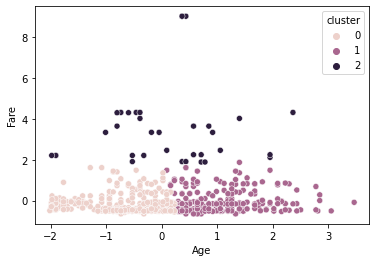

In [91]:
sns.scatterplot(data_enc_scaled['Age'],data_enc_scaled['Fare'],hue=data_enc_scaled['cluster'])

# PCA

In [49]:
pca = PCA(4)
data_enc_pca = pca.fit_transform(data_enc_scaled)
data_enc_pca = pd.DataFrame(data_enc_pca)
data_enc_pca.shape[1]

4

In [46]:
pca.explained_variance_ratio_.round(2)

array([0.25, 0.17, 0.13, 0.11, 0.09, 0.08, 0.06, 0.05, 0.04, 0.03, 0.  ,
       0.  ])